In [1]:
!uv pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [7]:
# Load YOLO11n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

model = YOLO('yolo11n.pt')  # load a pretrained YOLO OBB model

#results_ultralytics = model.train(data='coco8.yaml', epochs=3)  # train the model

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilahmedcs/stop-sign-dataset")

print("Path to dataset files:", path)


100%|██████████| 3.52M/3.52M [00:00<00:00, 191MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adilahmedcs/stop-sign-dataset/versions/1


In [ ]:
train_file_path = path+"/stop-sign--1"
train_path = "train.yaml"
yaml_text = f"""
path: {train_file_path}   # dataset root dir
train: train/images       # train images (relative to 'path')
val: valid/images          # val images (relative to 'path')

names: [
  Parking
  ,Speed-Limit
  ,Speed-limit
  ,Traffic-Light
  ,cross-walk
  ,speed-limit
  ,speed-limit
  ,stop
]  # class names"""

with open(train_path, "w") as f:
    f.write(yaml_text)
results = model.train(data=train_path, epochs=5, batch=1, optimizer="auto")


Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=train.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train11/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nhttinnguynbch/trafficsigns-detection-in-digital-racing")

print("Path to dataset files:", path)

100%|██████████| 115M/115M [00:00<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nhttinnguynbch/trafficsigns-detection-in-digital-racing/versions/1


In [ ]:
train_file_path = path+"/train_data"
train_path = "train.yaml"
yaml_text = f"""
path: {train_file_path}   # dataset root dir
train: train/images       # train images (relative to 'path')
val: val/images          # val images (relative to 'path')

names: [
  turn right,
  turn left,
  non-turn right,
  non-turn left,
  stop,
  go straight
]  # class names"""

with open(train_path, "w") as f:
    f.write(yaml_text)
results = model.train(data=train_path, epochs=1, batch=16, optimizer="SGD")

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=train.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train14/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train15, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, pl

In [ ]:
model.val()

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 300.1±72.8 MB/s, size: 8.8 KB)
val: Scanning /root/.cache/kagglehub/datasets/nhttinnguynbch/trafficsigns-detection-in-digital-racing/versions/1/train_data/val/labels.cache... 989 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 989/989 2.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 62/62 7.0it/s 8.9s
                   all        989       1129      0.943      0.938      0.976      0.744
            turn right        268        271      0.978      0.875      0.984       0.73
             turn left        151        153      0.939       0.91      0.969      0.744
        non-turn right        166        170      0.969       0.91       0.98      0.732
         non-turn left        185        189      0.829      0.958      0.938      0.711
                  stop        182        1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdc1ae97680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

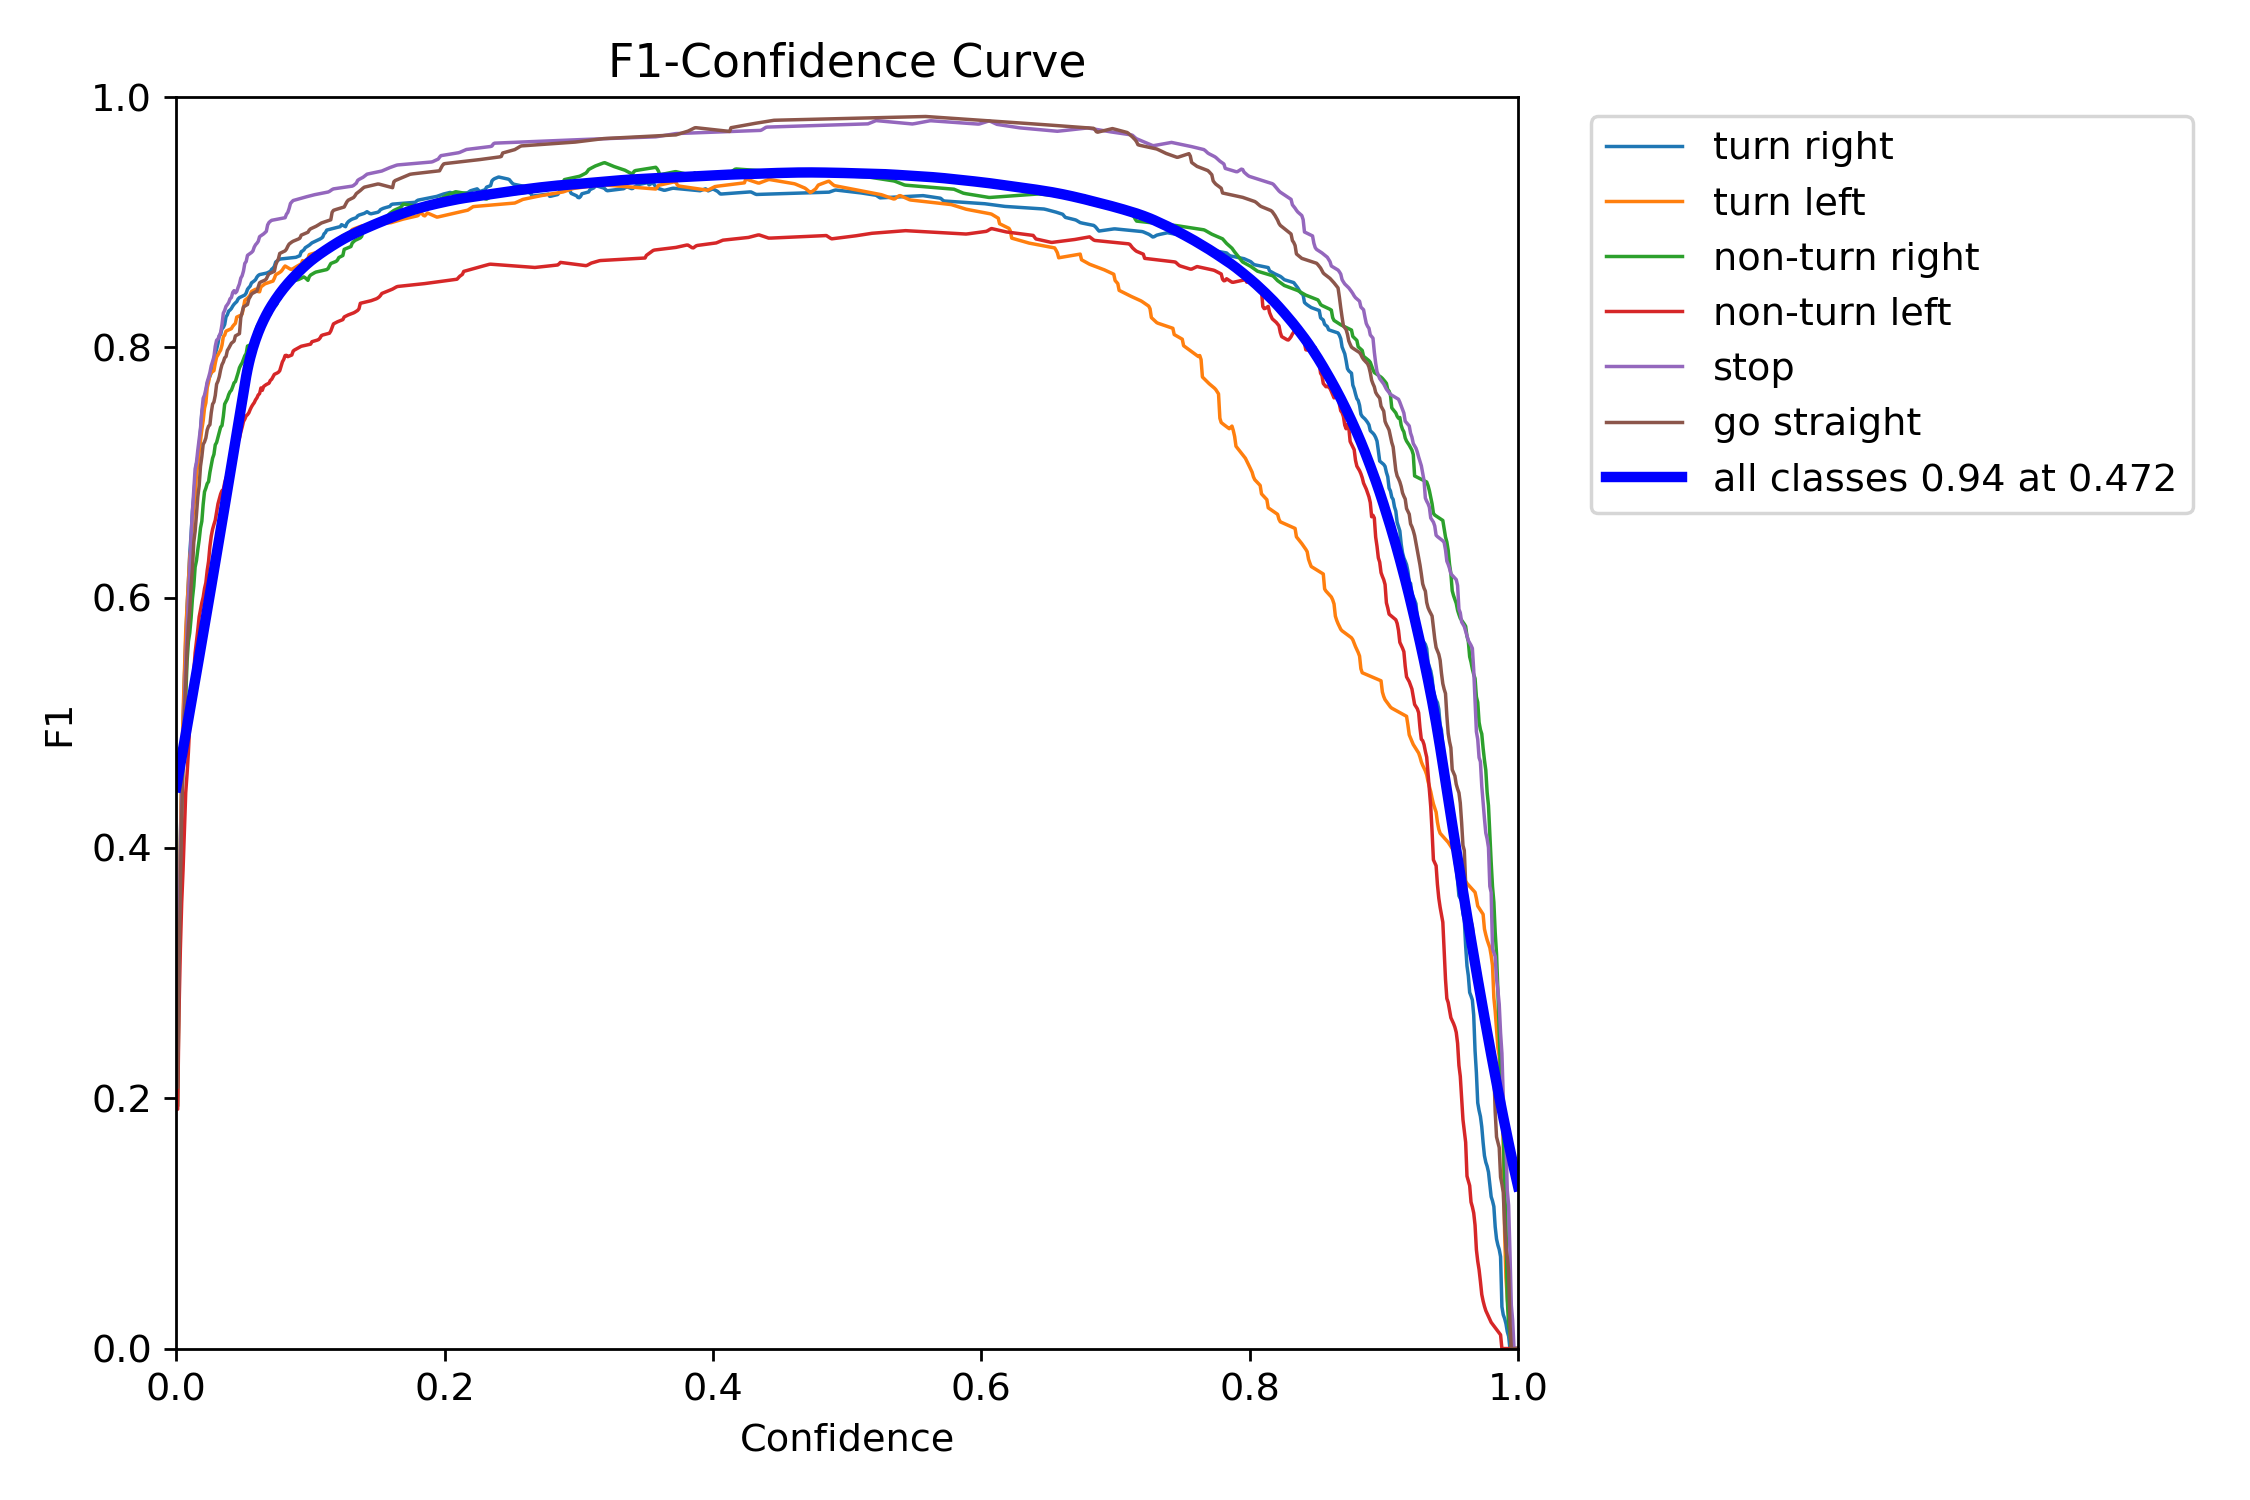

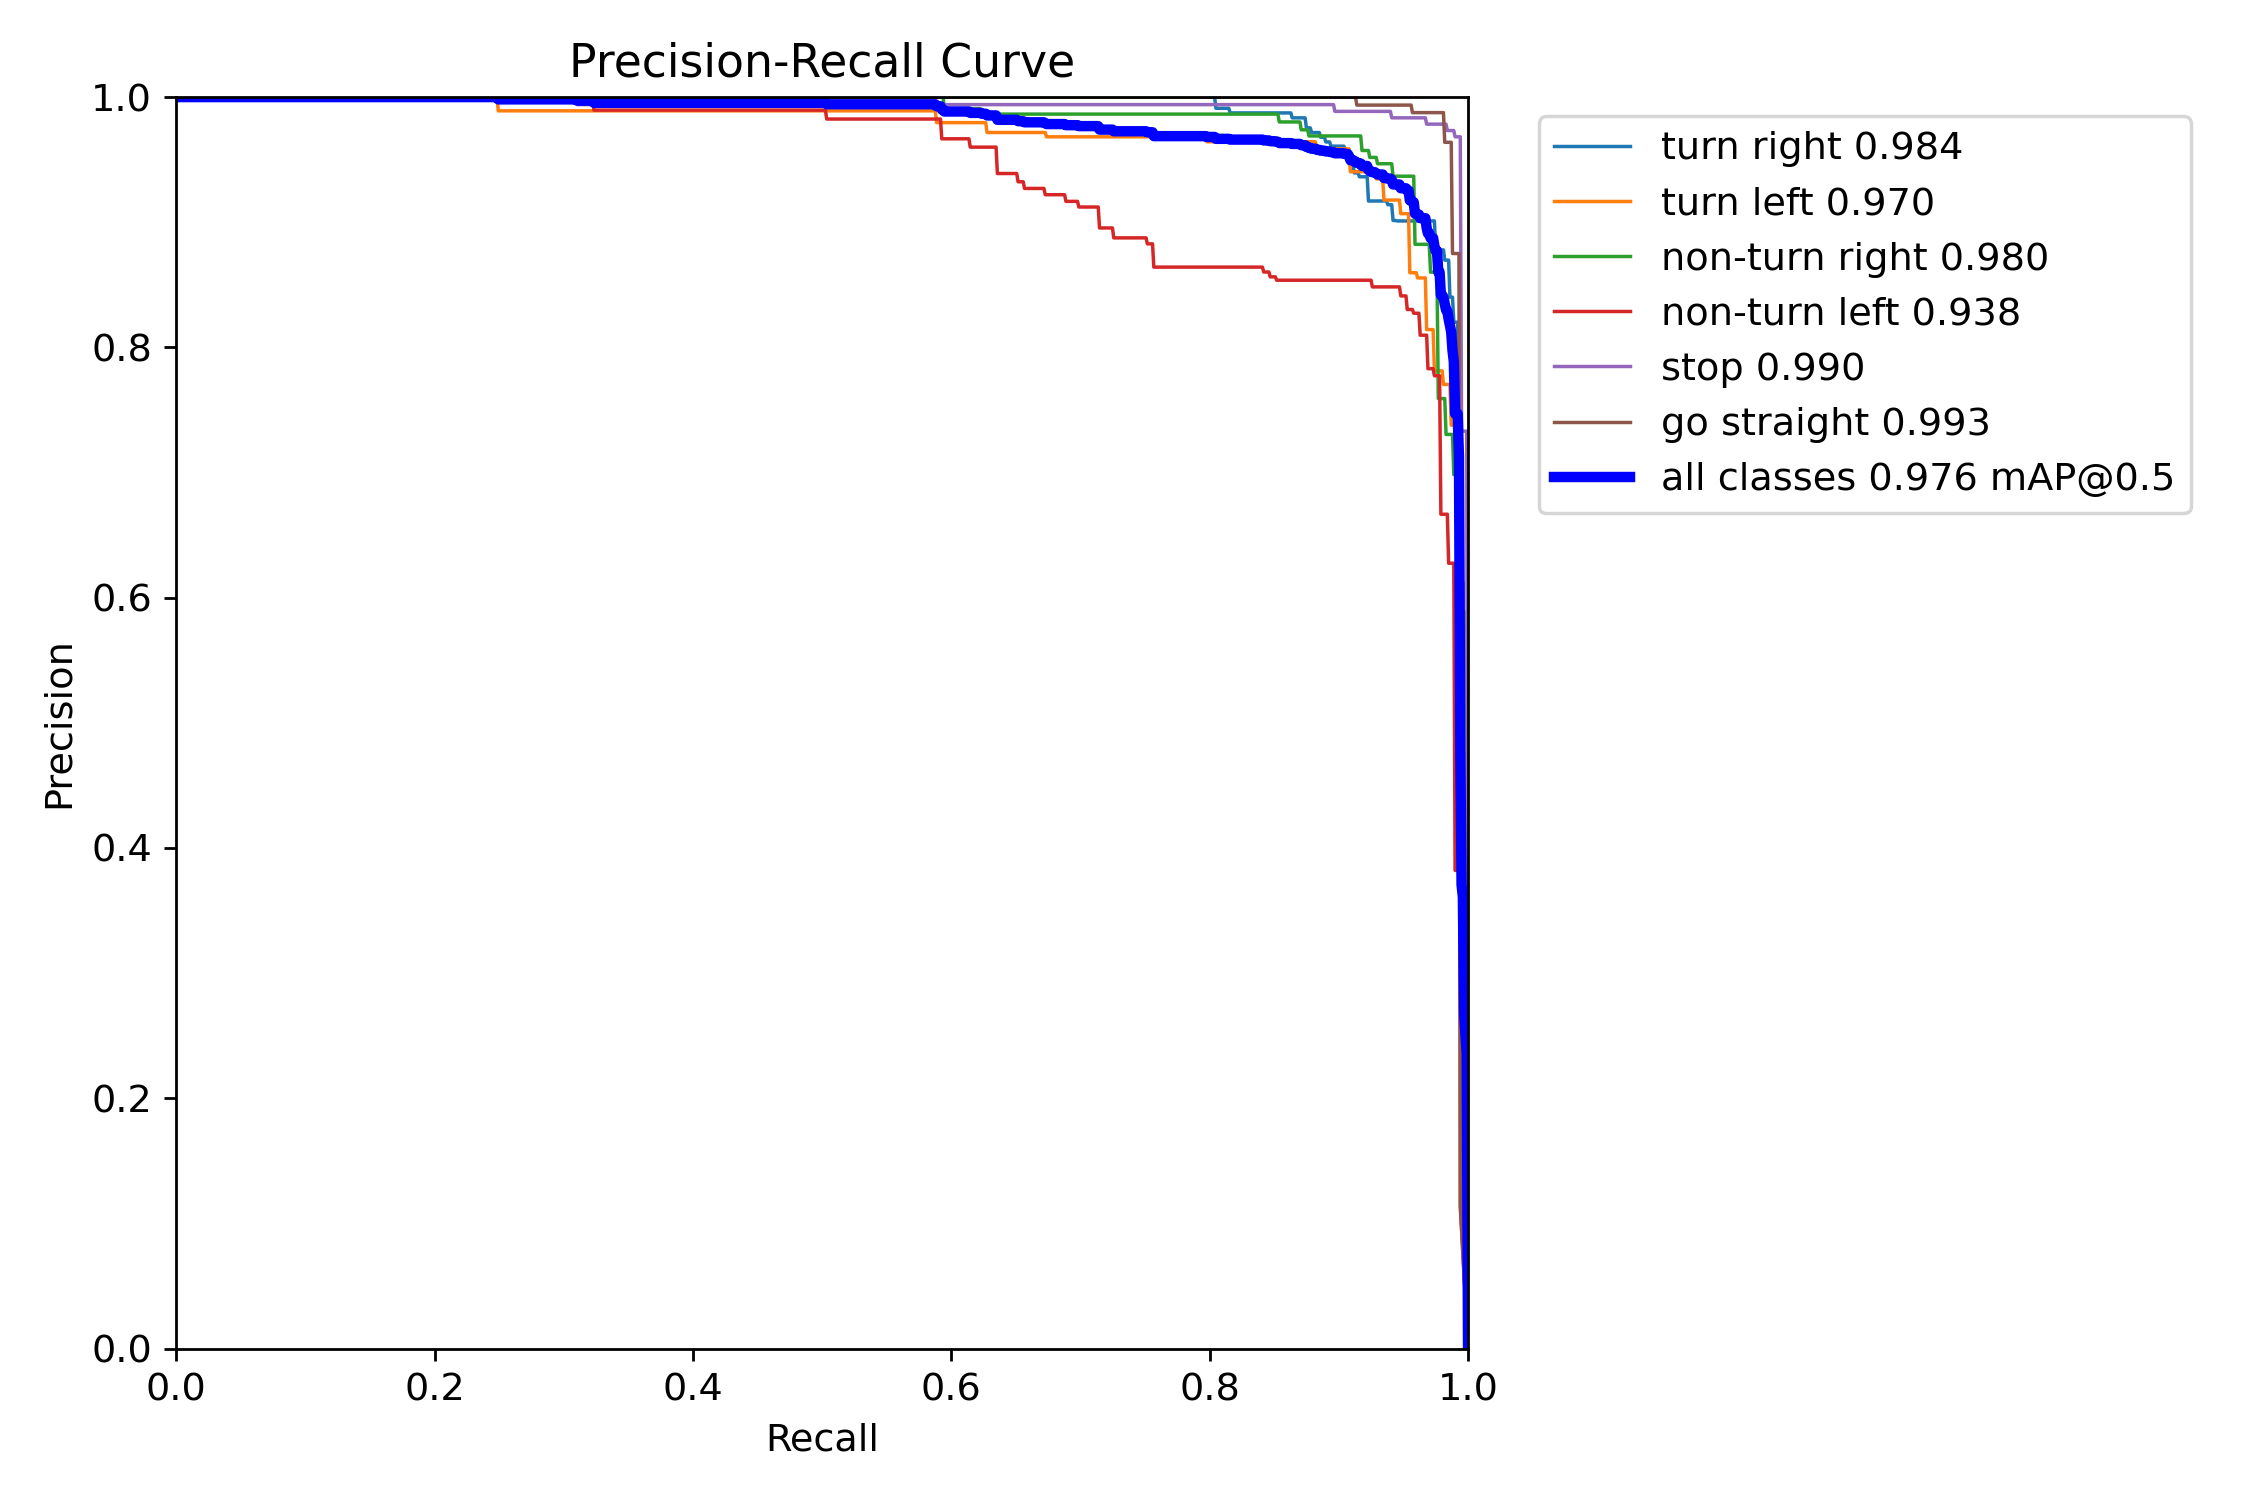

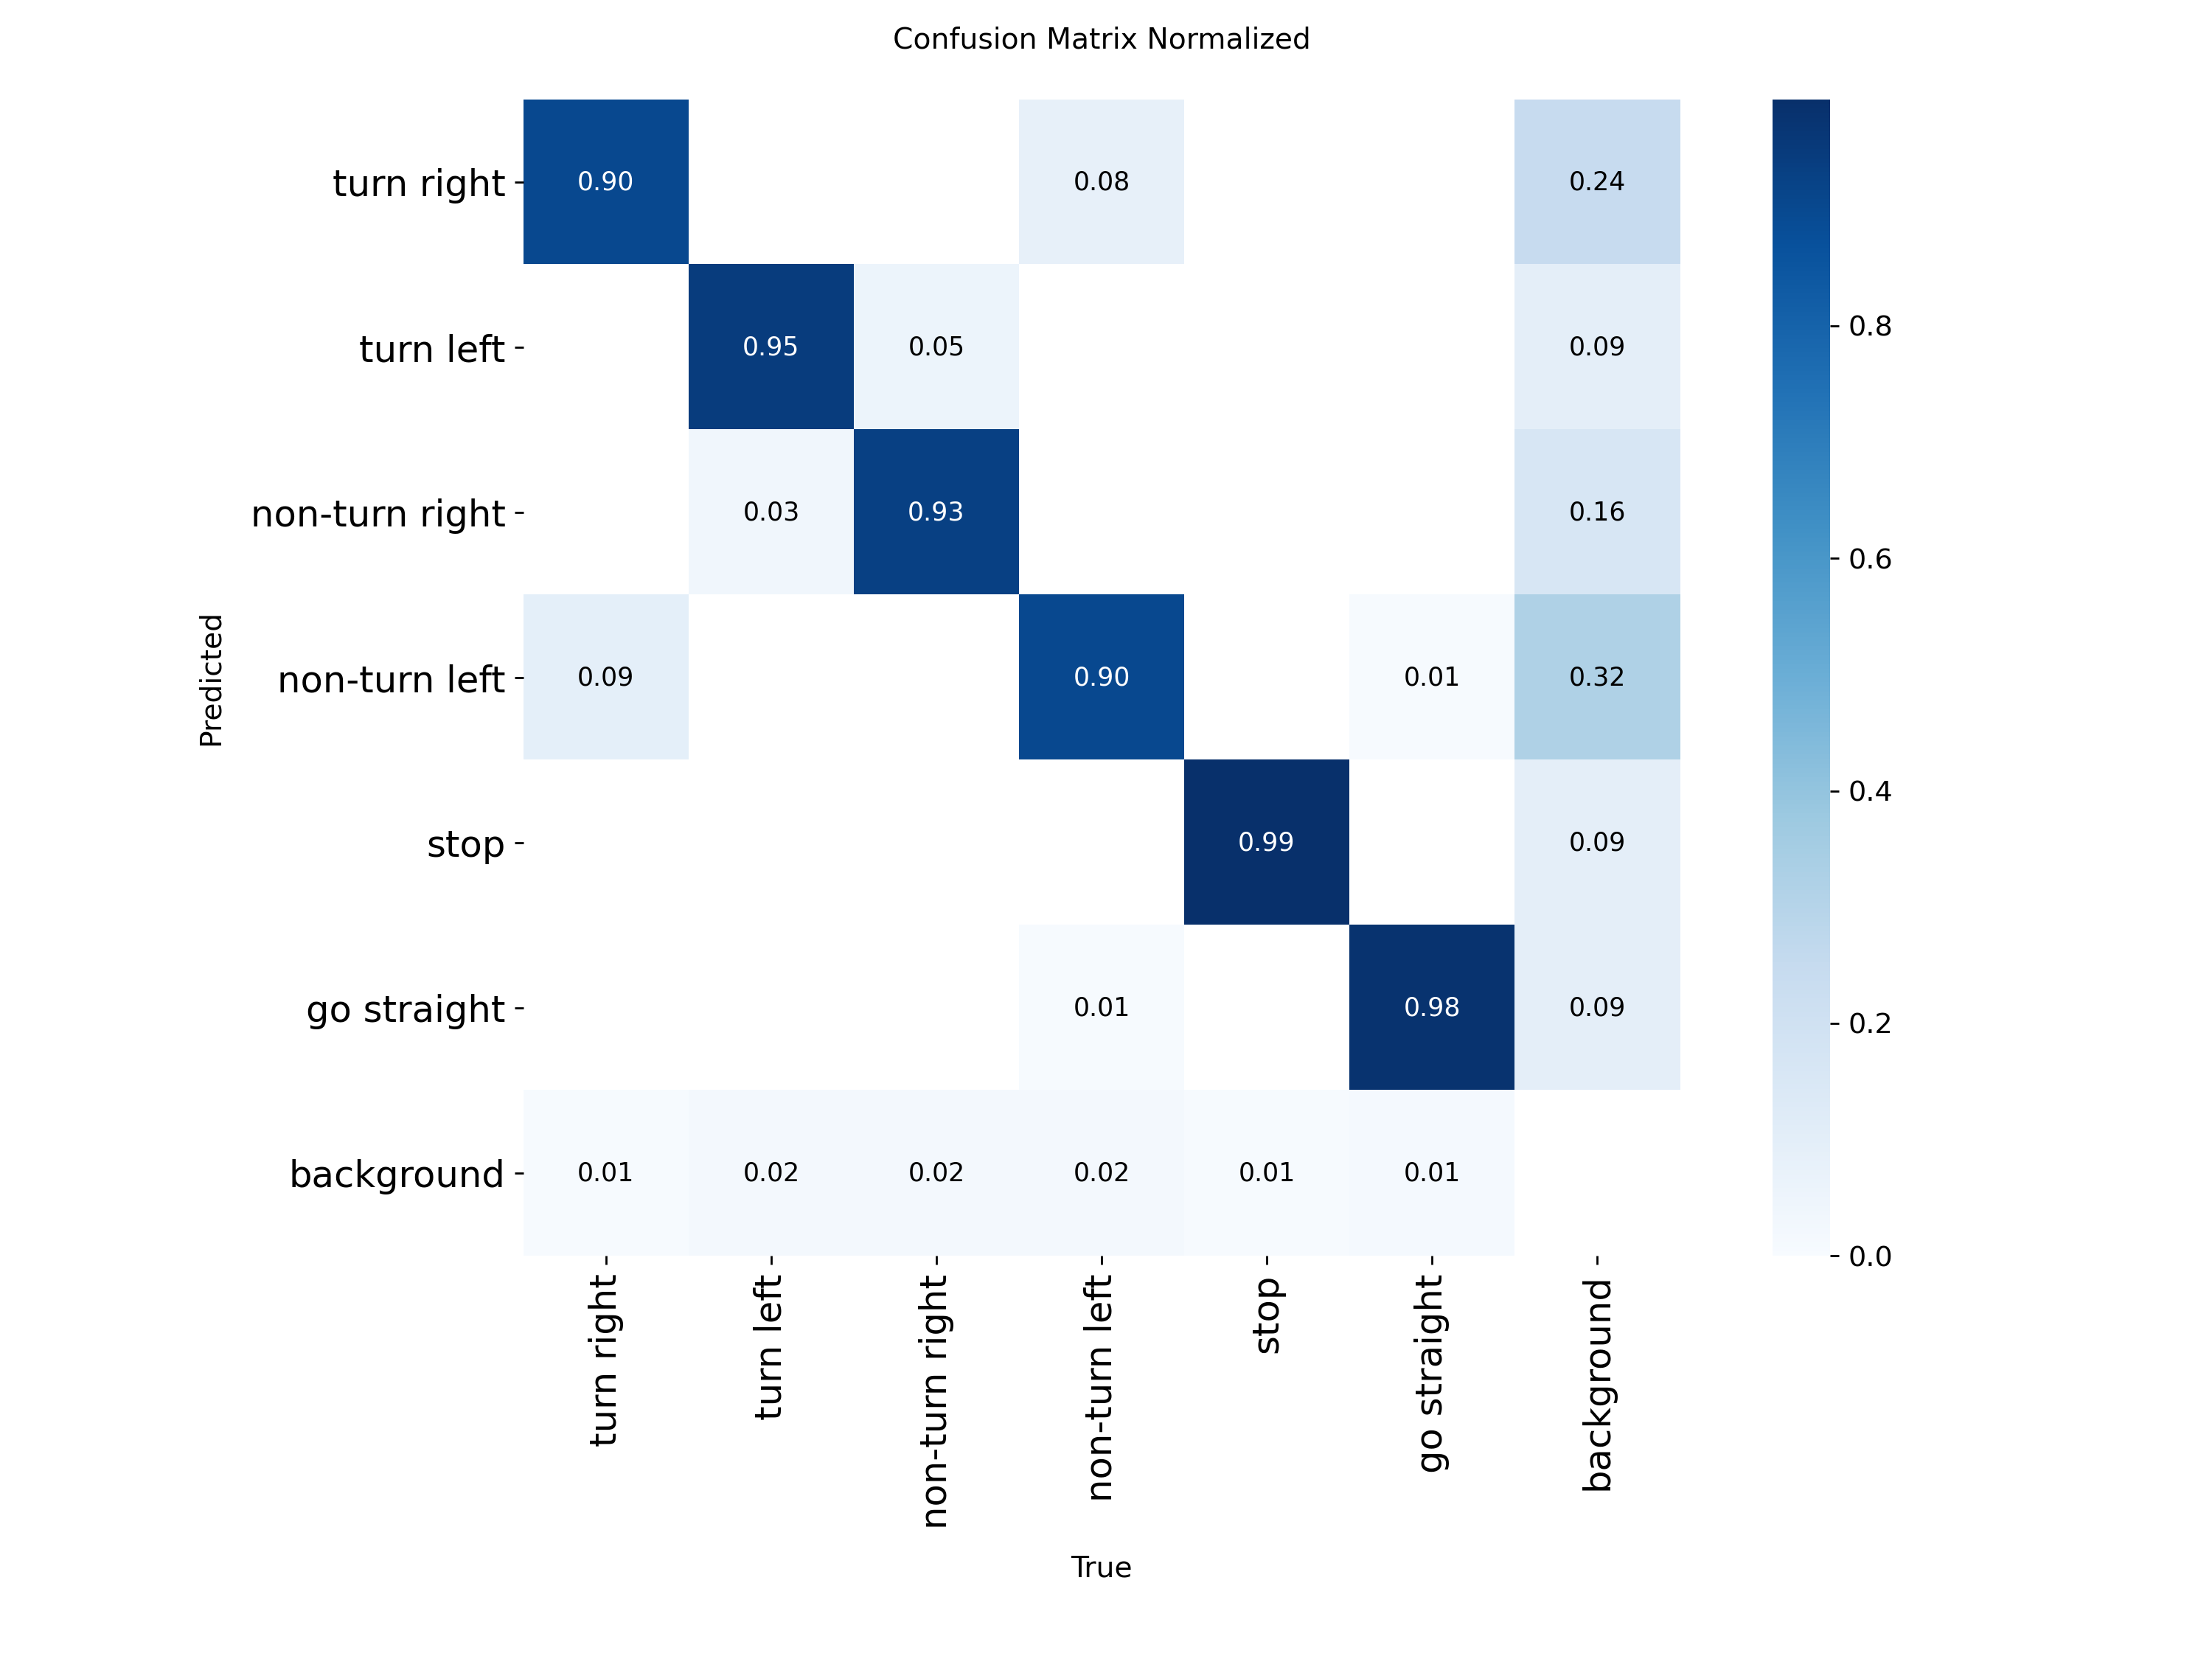

In [ ]:
model_path = "/content/runs/detect/train15"
# Show inline with matplotlib
cv2_imshow(cv2.imread(model_path+"/BoxF1_curve.png", cv2.IMREAD_UNCHANGED))
cv2_imshow(cv2.imread(model_path+"/BoxPR_curve.png", cv2.IMREAD_UNCHANGED))
cv2_imshow(cv2.imread(model_path+"/confusion_matrix_normalized.png", cv2.IMREAD_UNCHANGED))


image 1/1 /5.jpg: 448x640 1 stop, 12.8ms
Speed: 4.5ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


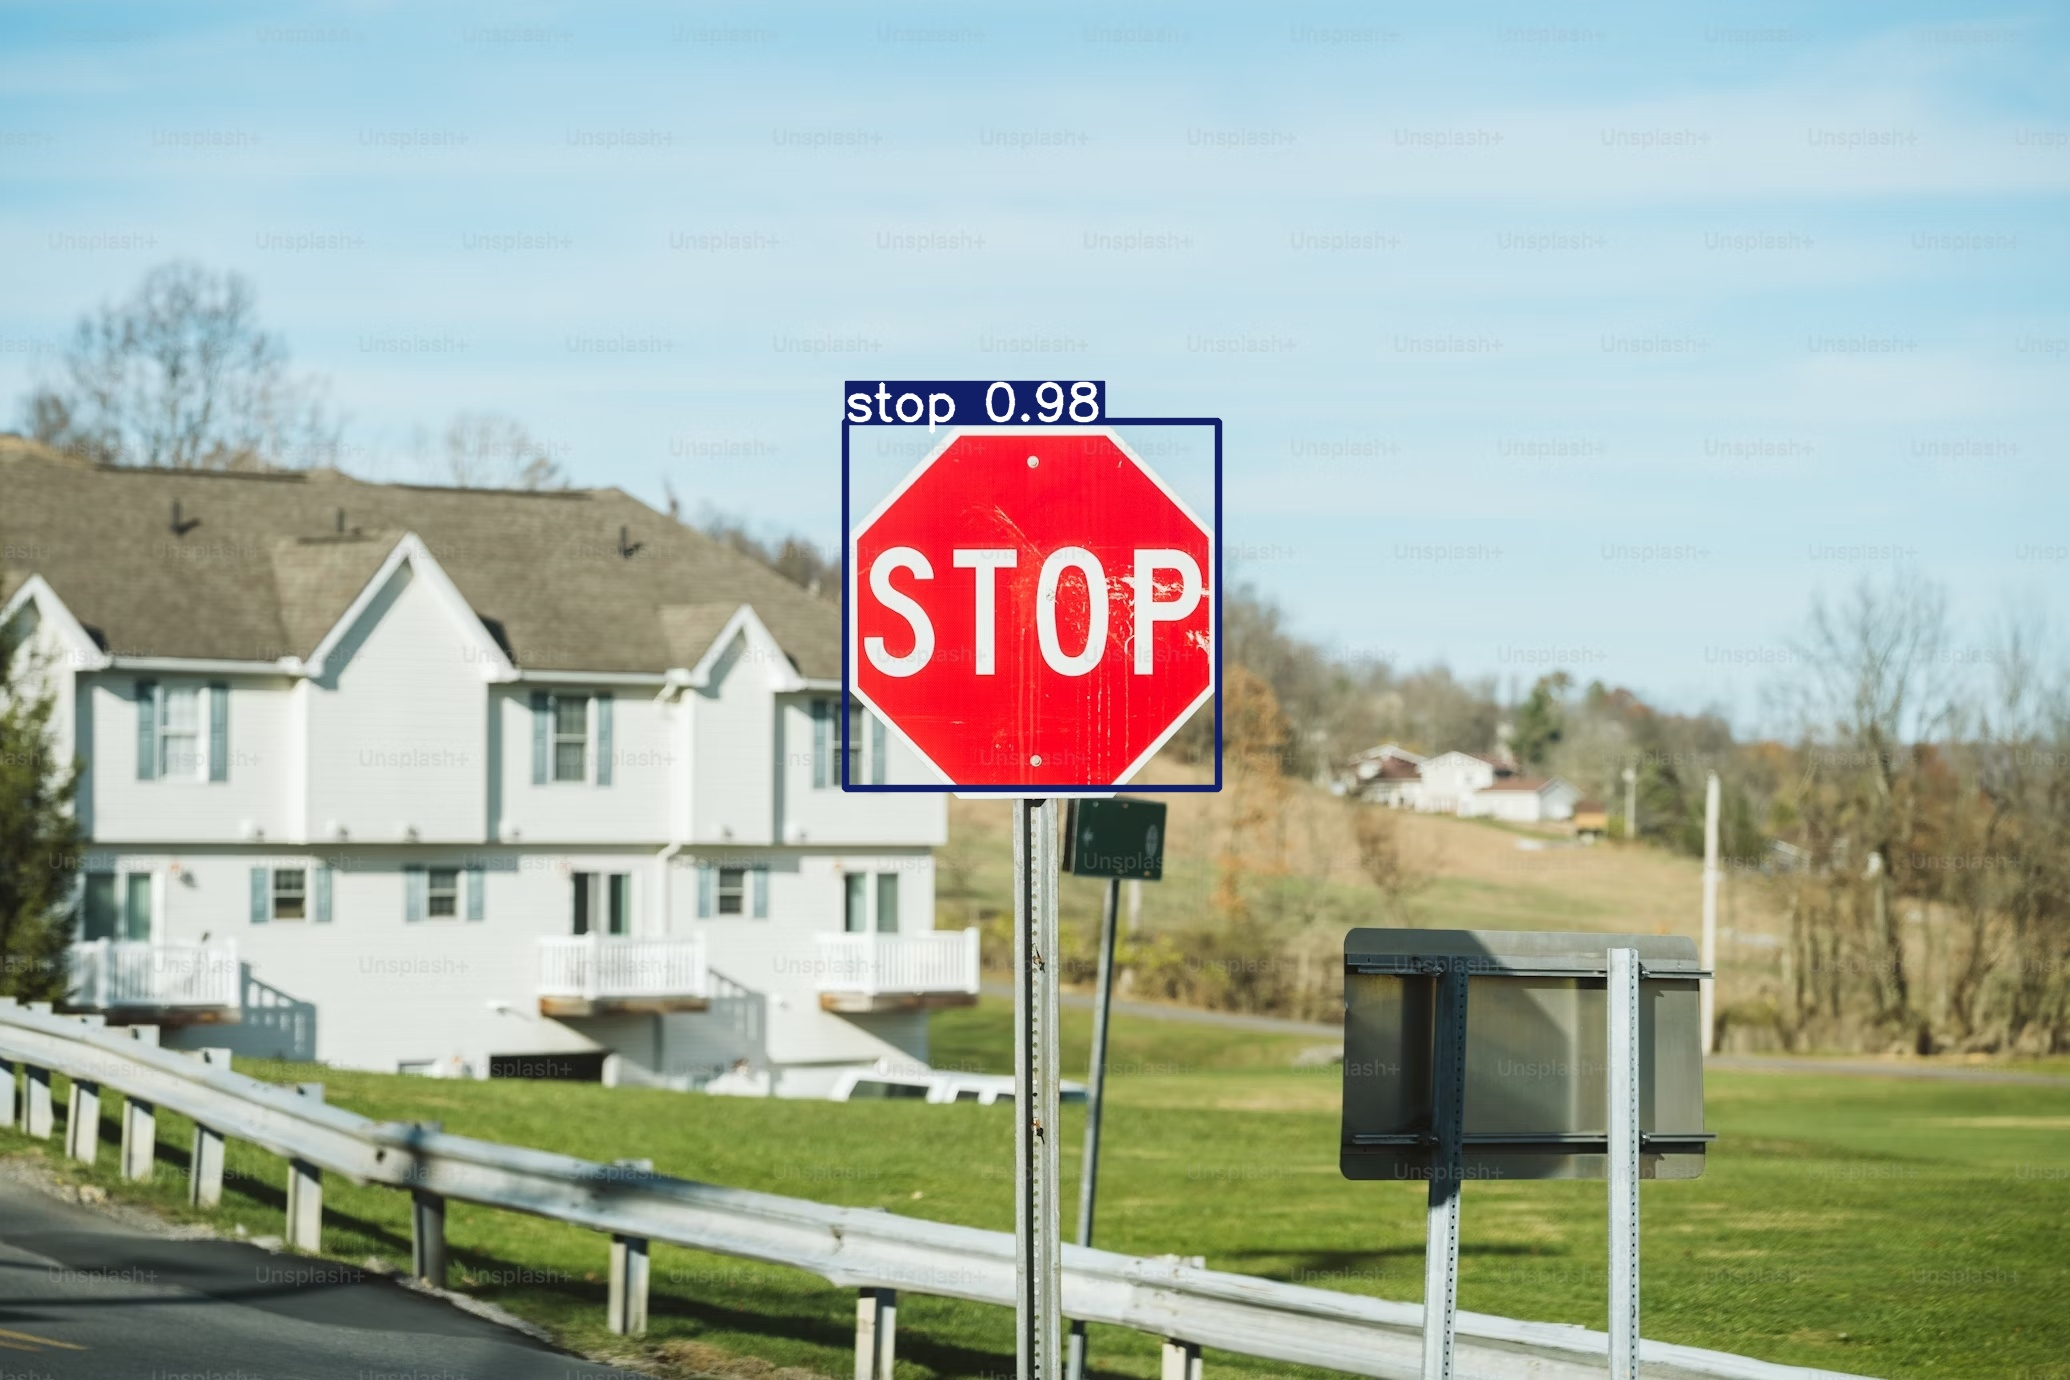

In [ ]:
model = YOLO(model_path + "/weights/last.pt")
results = model('/5.jpg')
# Get the first result’s plotted image
annotated = results[0].plot()


cv2.imwrite("detected.jpg", annotated)
# Show inline with matplotlib
cv2_imshow(cv2.imread("/content/detected.jpg", cv2.IMREAD_UNCHANGED))

In [ ]:
results = model.export(format='onnx')  # export the model to ONNX format

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train15/weights/last.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 13.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 19...
ONNX: slimming with onnxslim 0.1.67...
ONNX: export success ✅ 15.8s, saved as '/content/runs/detect/train15/weights/last.onnx' (10.1 MB)

Export complete (16.3s)
Results saved to /content/runs/detect/train15/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train15/weights/last.on